# Base code for agent-based modelling

#### to do list
* include agent id?

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import ABM_functions as abm
import pandas as pd

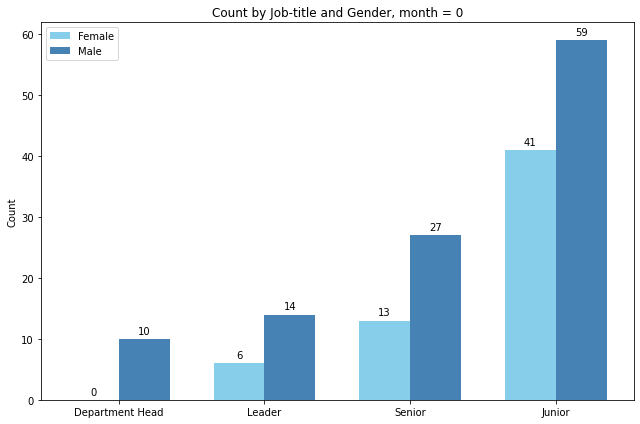

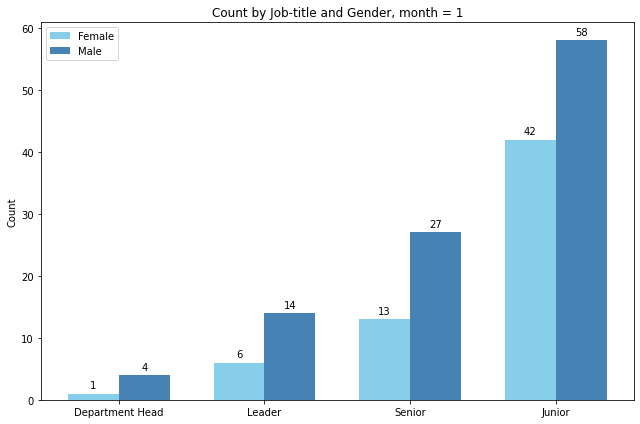

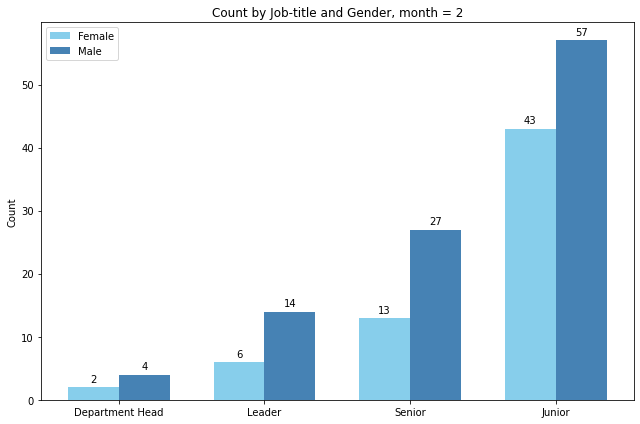

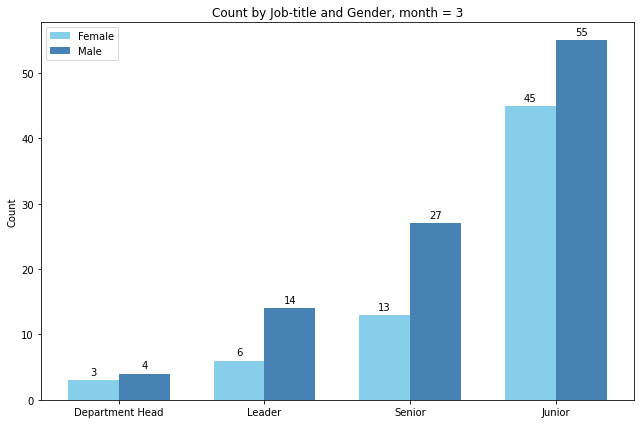

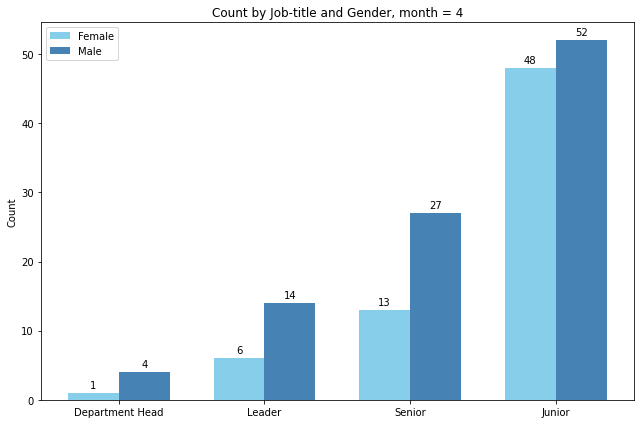

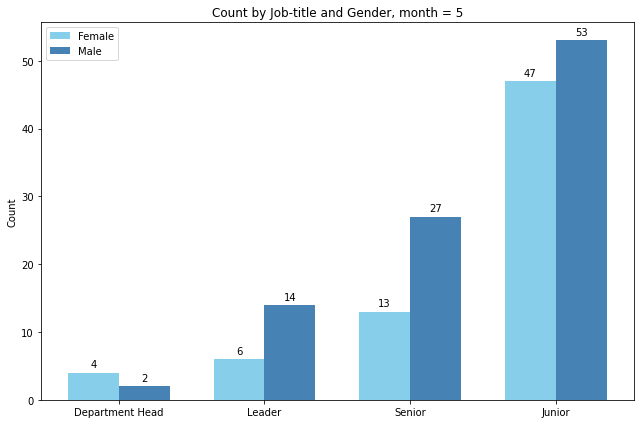

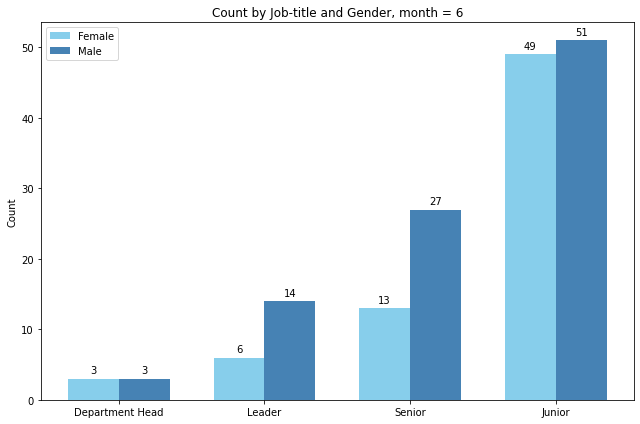

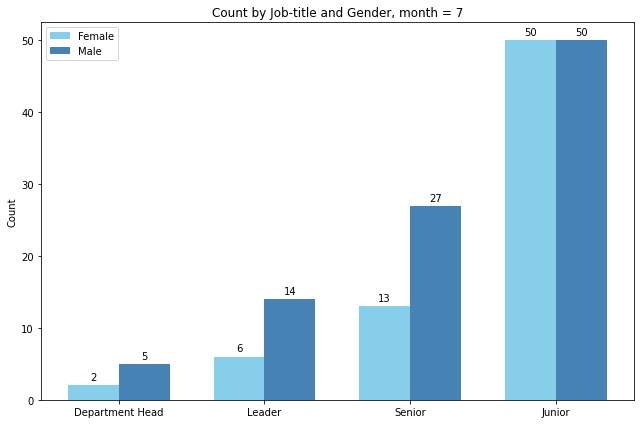

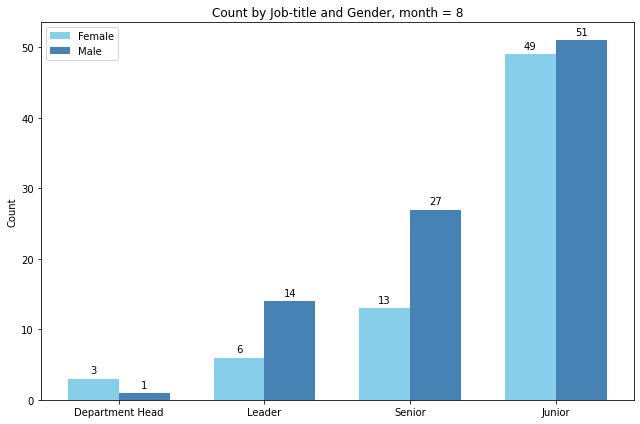

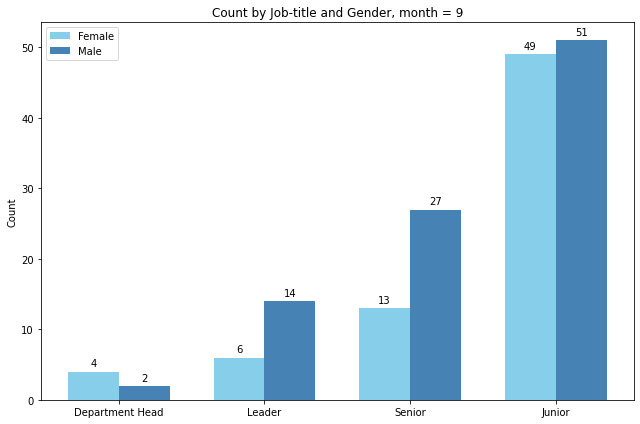

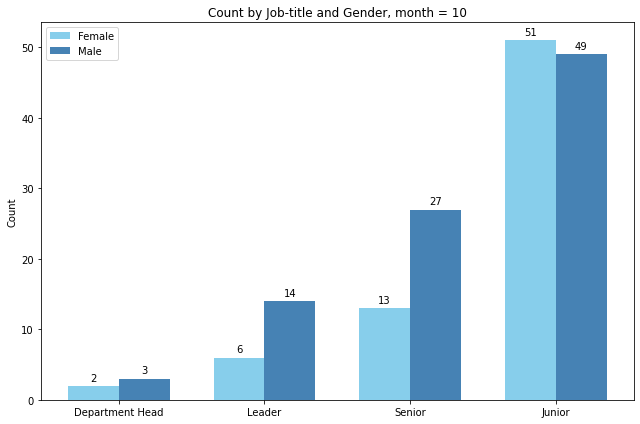

In [2]:
abm.run_abm(10, save_data=True, save_path='data/data.csv')

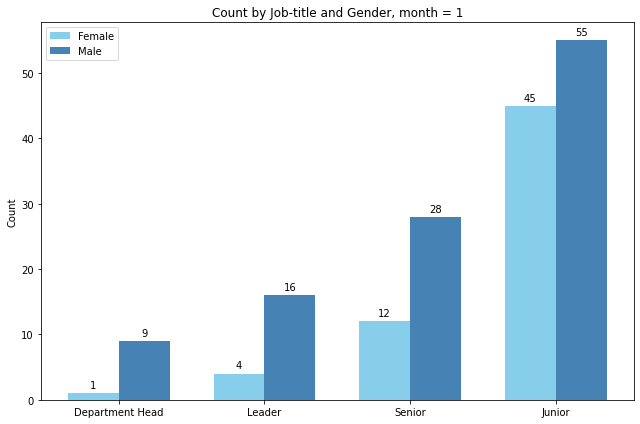

<AxesSubplot:title={'center':'Count by Job-title and Gender, month = 1'}, ylabel='Count'>

In [4]:
company = abm.create_company(['Department Head', 'Leader', 'Senior', 'Junior'], [10, 20, 40, 100])
abm.populate_company(company)
abm.plot_gender(company, 0)

In [10]:
new_data = pd.DataFrame(np.append(abm.count_gender(company)[0].reshape(1, -1),('female')), columns = list(company.keys()).append('Gender'))


In [20]:
company.keys().append('Gender')

AttributeError: 'dict_keys' object has no attribute 'append'

In [26]:
columnnames = list(company.keys())
columnnames.append('Gender')

In [13]:
abm.count_gender(company)[0]

array([ 0,  2, 18, 55])

In [8]:
company.keys()

dict_keys(['Department Head', 'Leader', 'Senior', 'Junior'])

In [51]:
month = 1

d = {'tick': month, 'gender': }
new_data = pd.DataFrame.from_dict(dict_with_data, orient = 'index', columns=['gender'])

In [52]:
new_data

,gender
tick,1
gender,"{'female': [1, 2, 5, 3], 'male': [1, 2, 3, 4]}"
